## ライブラリ等のインポート

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import TTestIndPower
from statsmodels.api import qqplot

%matplotlib inline

## データ準備

In [2]:
# データのロード
df = sns.load_dataset('tips')
# チップ率を計算
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布の描画

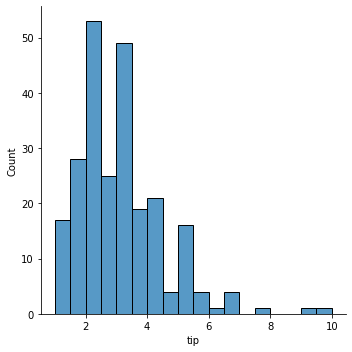

In [3]:
# seabornのバージョン(sns.__version__)が0.11.0以上ならsns.displot()を使う
# ヒストグラム
sns.displot(df['tip'], kde=False)

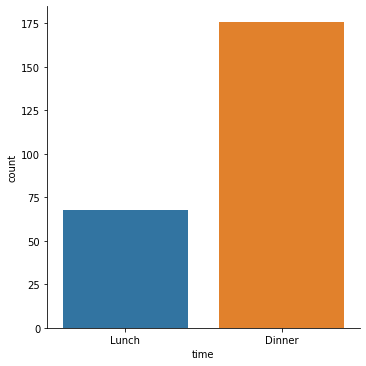

In [4]:
# 棒グラフ
sns.catplot(x='time', data=df, kind='count')

## 平均値

In [5]:
np.mean(df['tip_rate'])

0.16080258172250478

In [6]:
df['tip_rate'].mean()

0.16080258172250478

In [7]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

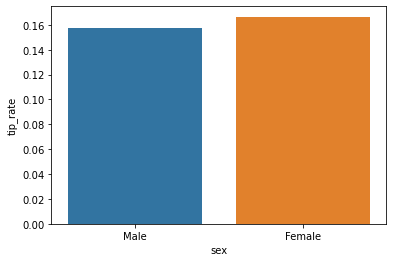

In [8]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

<AxesSubplot:xlabel='sex'>

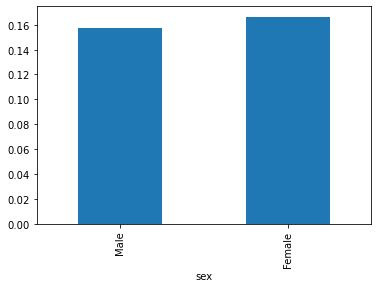

In [9]:
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## 中央値

In [10]:
np.median(df['tip_rate'])

0.15476977125802577

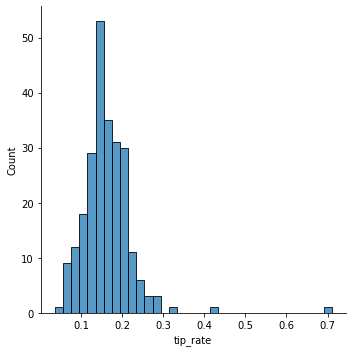

In [11]:
sns.displot(df['tip_rate'], kde=False)

In [12]:
df['tip_rate'].median()

0.15476977125802577

In [13]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

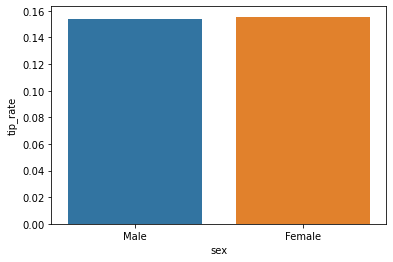

In [14]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [15]:
df.sort_values('tip_rate', ascending=True)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


## 最頻値

In [16]:
mode, count = stats.mode(df)

In [17]:
# 戻り値はリスト
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [18]:
# チップ率の最頻値は二つある
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

In [19]:
# Seriesでも可能
mode, count = stats.mode(df['size'])
print(mode, count)

[2] [156]


## 範囲

In [20]:
# 最小値
np.min(df['tip'])

1.0

In [21]:
df['tip'].min()

1.0

In [22]:
df.groupby('sex').min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [23]:
# 最大値
np.max(df['tip'])

10.0

In [24]:
df['tip'].max()

10.0

In [25]:
df.groupby('sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


In [26]:
# 範囲: 最大値 - 最小値
df['tip'].max() - df['tip'].min()

9.0

## 四分位数

In [27]:
# 任意の分位数を求める
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [28]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [29]:
# IQR: 四分位範囲
stats.iqr(df['tip_rate'])

0.06234812458689151

In [30]:
# Q3 - Q1がIQRと同じであることを確認
0.191475 - 0.129127

0.062348000000000015

In [31]:
# QD: 四分位偏差(IQR/2)
stats.iqr(df['tip_rate']) / 2

0.031174062293445756

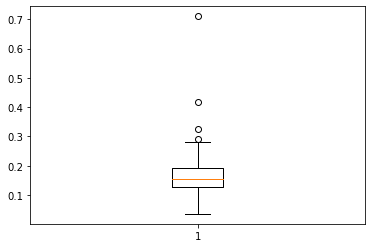

In [32]:
# 箱ひげ図
plt.boxplot(df['tip_rate'])
plt.show()

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

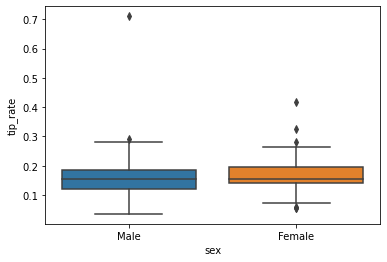

In [33]:
sns.boxplot(x='sex', y='tip_rate', data=df)

## 分散

In [34]:
np.var(df['tip'])

1.9066085124966428

## 標準偏差

In [35]:
np.std(df['tip'])

1.3807999538298958

In [36]:
# 分散の平方根が分散であることを確認
np.sqrt(np.var(df['tip']))

1.3807999538298958

## 共分散

In [37]:
# 分散共分散行列
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [38]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [39]:
# df.cov()は不偏共分散行列を返す(nではなくn-1で割った時の分散と共分散であることに注意)
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## 相関係数

In [40]:
# 相関行列
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [41]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [42]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

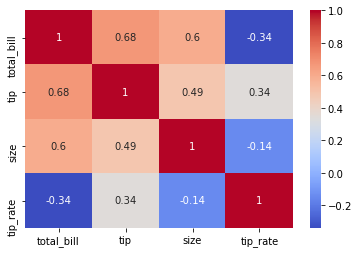

In [43]:
# 相関行列をheatmapを使って表示
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## 連関

In [44]:
# 分割表
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [45]:
cont_table = pd.crosstab(df['sex'], df['time'])
# 第一戻り値がカイ二乗, 第四戻り値が期待度数
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

## クラメールの連関係数

In [46]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) - 1
    n = len(x)
    v = np.sqrt(chi2/(min_d*n))
    return v

In [47]:
cramers_v(df['sex'], df['time'])

0.20523129613344476

## 確率分布

In [48]:
# random variates(rvs): 確率変量
stats.randint.rvs(1, 7)

2

In [49]:
stats.uniform(0, 1).rvs()

0.4472931614668868

## 確率分布の描画

In [50]:
# サンプル関数
def simple_func(x):
    return x**2 + 3
simple_func(10)

103

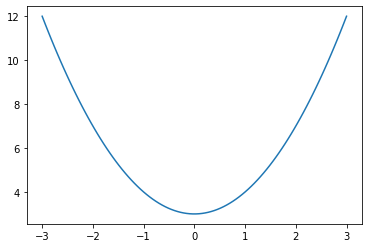

In [51]:
# 連続したx軸の値を作成
x = np.linspace(-3, 3, 100)
# 整数のみのx軸の値を作成
# x = np.arange(-3, 4)
y = simple_func(x)
# 関数を描画
plt.plot(x, y)

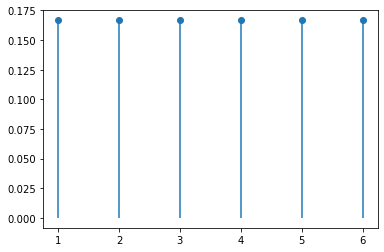

In [52]:
# 離散型確率分布
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

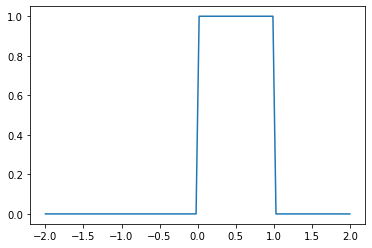

In [53]:
# 連続型確率分布
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x, y)

## CDF

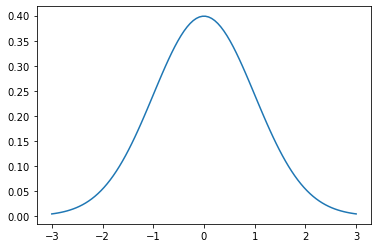

In [54]:
# pdfを描画(正規分布)
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

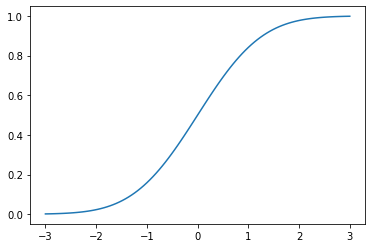

In [55]:
# 正規分布のCDF
y = stats.norm.cdf(x)
plt.plot(x, y)

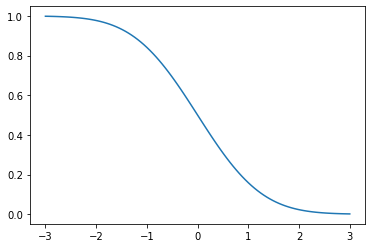

In [56]:
# survival function(sf) =  cdf - 1
y = stats.norm.sf(x)
plt.plot(x, y)

## 正規分布

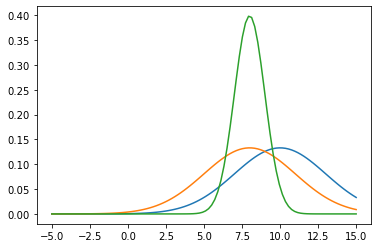

In [57]:
# さまざまな正規分布を描画
x = np.linspace(-5, 15, 100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

## KDE

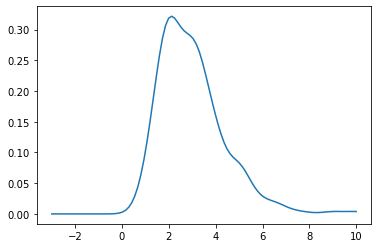

In [58]:
# tipカラムの確率分布をKDEで推定する
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(df['tip']).pdf(x)
plt.plot(x, y)

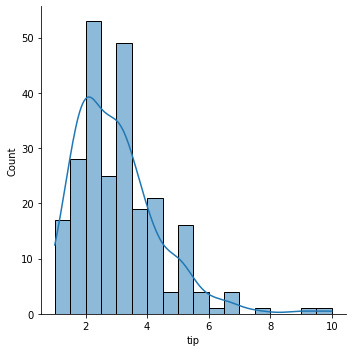

In [59]:
# .displotのkdeをTrueにするとKDEの結果を描画する
sns.displot(df['tip'], kde=True)

In [60]:
# KDEした結果の確率分布からresample(再度データを抽出)することができる
resample_data = stats.gaussian_kde(df['tip']).resample()

## 68-95-99.7ルール

In [61]:
# 68-95-99.7ルールを確認
group1 = []
group2 = []
group3 = []
samples = []
loc = 4
scale = 3

for i in range(1000):
    sample = stats.norm(loc=loc, scale=scale).rvs()
    if loc-scale < sample < loc+scale:
        group1.append(sample)
    elif loc-2*scale < sample < loc+2*scale:
        group2.append(sample)
    elif loc-3*scale < sample < loc+3*scale:
        group3.append(sample)
    samples.append(sample)

In [62]:
print(len(group1)/len(samples))
print((len(group1) + len(group2))/len(samples))
print((len(group1) + len(group2) + len(group3))/len(samples))

0.669
0.957
1.0


## 標準化

In [63]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1))

## 二項分布

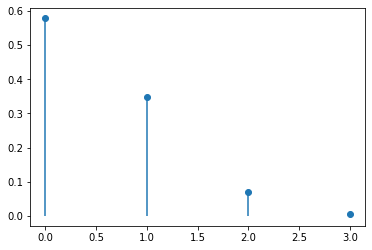

In [64]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

## 二項分布->正規分布

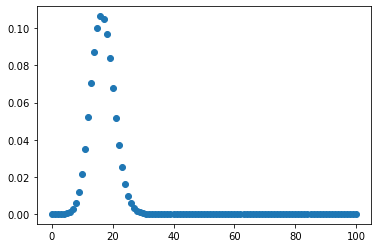

In [65]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n, p).pmf(x)
plt.plot(x, y, 'o')

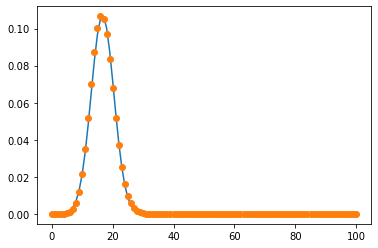

In [66]:
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)
plt.plot(x, y, 'o')

In [67]:
# 平均=np
stats.binom(n, p).mean()

16.666666666666664

In [68]:
n*p

16.666666666666664

In [69]:
# 分散=np(1-p)
stats.binom(n, p).var()

13.888888888888888

In [70]:
n*p*(1-p)

13.888888888888888

## 標本分布

In [71]:
m = 100
n = 50
column = 'tip'
sample_means = []
for i in range(m):
    sampled_df = df.sample(n)
    sample_mean = sampled_df[column].mean()
    sample_means.append(sample_mean)

In [72]:
#平均
np.mean(sample_means)

3.0006660000000007

In [73]:
# 母平均
df[column].mean()

2.9982786885245902

In [74]:
# 分散 (実際には不偏分散stats.tvar()を使った方が良い)
# 外れ値の影響で母分散と差が出てしまう
np.var(sample_means)

0.036342718444

In [75]:
# 母分散/n
np.var(df[column])/n

0.03813217024993285

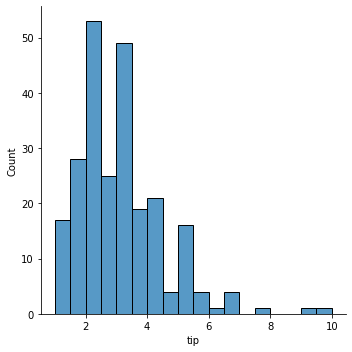

In [76]:
sns.displot(df[column])

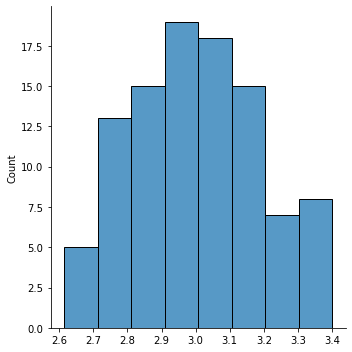

In [77]:
# 無限回やると平均の標本分布(平均=母平均, 分散=母分散/n)になる
sns.displot(sample_means)

## 不偏分散

In [78]:
#不偏分散
stats.tvar(df['tip'])

1.914454638062471

In [79]:
np.var(df['tip'], ddof=1)

1.9144546380624725

In [80]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [81]:
stats.tstd(df['tip'])

1.3836381890011822

In [82]:
np.std(df['tip'], ddof=1)

1.3836381890011826

## 不偏分散の不偏性

In [83]:
n = 50
m = 1000
column = 'tip'
sample_vars = []
sample_uvars = []
for i in range(m):
    sample_df = df.sample(n)
    sample_var = np.var(sample_df[column])
    sample_uvar = stats.tvar(sample_df[column])
    sample_vars.append(sample_var)
    sample_uvars.append(sample_uvar)

In [84]:
# 標本の不偏分散の平均
np.mean(sample_uvars)

1.9031641021632655

In [85]:
# 母分散
np.var(df[column])

1.9066085124966428

In [86]:
# 標本の分散の平均
np.mean(sample_vars)

1.8651008201200001

## 比率の区間推定

In [87]:
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

In [88]:
stats.binom.interval(0.99, 1000, 0.6)

(560.0, 640.0)

In [89]:
n = 50
m = 100
alpha = 0.95
population_male_ratio = len(df[df['sex']=='Male']) / len(df)
results = []
for _ in range(m):
    sample_df = df.sample(n)
    male_ratio = len(sample_df[sample_df['sex']=='Male'])/len(sample_df)
    min_num, max_num = stats.binom.interval(alpha, n=n, p=male_ratio)
    min_ratio = min_num / n
    max_ratio = max_num / n
    correct = min_ratio < population_male_ratio < max_ratio
    results.append({'min': min_ratio, 'max': max_ratio, 'correct':correct})

In [90]:
result_df = pd.DataFrame(results)

In [91]:
result_df['correct'].value_counts()

True     94
False     6
Name: correct, dtype: int64

## 平均の区間推定

In [92]:
column = 'tip'
alpha = 0.95
n = 50
m = 100
population_mean = df[column].mean()
results = []
for _ in range(m):
    sample_df = df.sample(n)
    sample_mean = sample_df[column].mean()
    sample_var = stats.tvar(sample_df[column])
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
    correct = min_val < population_mean < max_val
    results.append({'min': min_val, 'max': max_val, 'correct': correct})

In [93]:
result_df = pd.DataFrame(results)

In [94]:
result_df['correct'].value_counts()

True     97
False     3
Name: correct, dtype: int64

## t分布

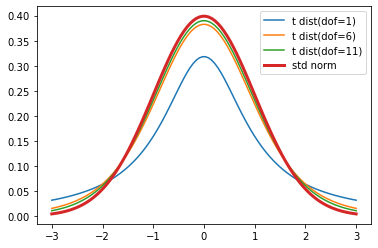

In [95]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label="std norm", linewidth=3)
plt.legend()

## 平均の区間推定(正規分布 vs t分布)

In [96]:
column = 'tip'
alpha = 0.95
n = 50
population_mean = df[column].mean()

sample_df = df.sample(n)
sample_mean = sample_df[column].mean()
sample_var = stats.tvar(sample_df[column])
min_val_norm, max_val_norm = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
min_val_t, max_val_t = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=n-1)

In [97]:
# 正規分布の結果
print(min_val_norm, max_val_norm)

2.7619405913620048 3.691659408637997


In [98]:
# t分布の結果
print(min_val_t, max_val_t)

2.7501739178439872 3.7034260821560143


## 比率の差の検定(Z-test)

In [99]:
proportions_ztest([30, 33], [1000, 1000], alternative='smaller')

(-0.3840618481549573, 0.35046630388746547)

## 連関の検定

In [100]:
obs = [[15, 5] ,[15, 65]]
stats.chi2_contingency(obs, correction=False)

(24.107142857142858,
 9.112167294252327e-07,
 1,
 array([[ 6., 14.],
        [24., 56.]]))

## Z検定とカイ二乗検定

In [101]:
n = 50
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)

In [102]:
count1 = sample_df1['time'].value_counts()['Dinner']
count2 = sample_df2['time'].value_counts()['Dinner']

In [103]:
# Z検定
proportions_ztest([count1, count2], [n, n], alternative='two-sided')

(-2.3062266407882204, 0.021097971724778362)

In [104]:
sample1_freq = sample_df1['time'].value_counts().values
sample2_freq = sample_df2['time'].value_counts().values

In [105]:
# カイ二乗検定
stats.chi2_contingency([sample1_freq, sample2_freq], correction=False)

(5.318681318681319,
 0.02109797172477835,
 1,
 array([[32.5, 17.5],
        [32.5, 17.5]]))

## 平均値差の検定

In [106]:
male_tips = df[df['sex']=='Male']['tip_rate']
female_tips = df[df['sex']=='Female']['tip_rate']

In [107]:
# 標本分散
print(np.var(male_tips), np.var(female_tips))

0.004169445577529407 0.0028433004255488206


In [108]:
# 標本平均
print(np.mean(male_tips), np.mean(female_tips))

0.15765054700429748 0.16649073632892475


In [109]:
# スチューデントのt検定
stats.ttest_ind(male_tips, female_tips)

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

In [110]:
# ウェルチのt検定
stats.ttest_ind(male_tips, female_tips, equal_var=False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

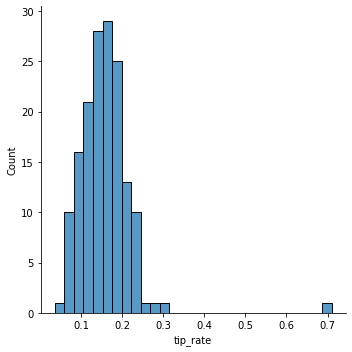

In [111]:
# 男性のtipの分布
sns.displot(male_tips)

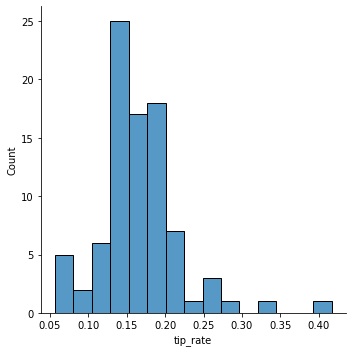

In [112]:
# 女性のtipの分布
sns.displot(female_tips)

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

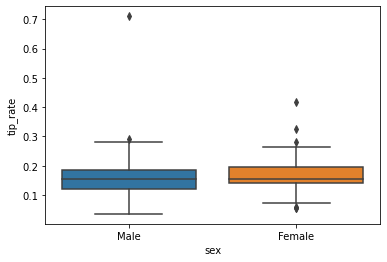

In [113]:
sns.boxplot(data=df, x='sex', y='tip_rate')

## QQプロット

In [114]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

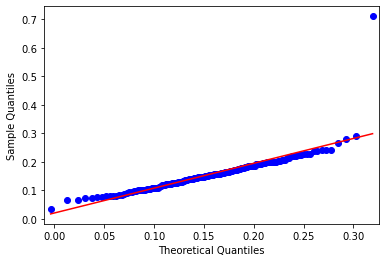

In [115]:
# 男性のtipのQQプロット
fig = qqplot(male_tipr,
             line='r',
             dist=stats.norm(loc=np.mean(male_tipr), scale=np.sqrt(stats.tvar(male_tipr))))

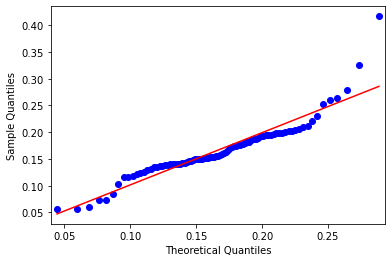

In [116]:
# 女性のtipのQQプロット
fig = qqplot(female_tipr,
             line='r',
             dist=stats.norm(loc=np.mean(female_tipr), scale=np.sqrt(stats.tvar(female_tipr))))

## シャピロウィルクの検定

In [117]:
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447847127914429, pvalue=3.2243281107541917e-15)

In [118]:
stats.shapiro(female_tipr)

ShapiroResult(statistic=0.8982974290847778, pvalue=4.717996489489451e-06)

In [119]:
# 外れ値を除く
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

In [120]:
# 外れ値を除く
stats.shapiro(np.sort(female_tipr)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

## F分布

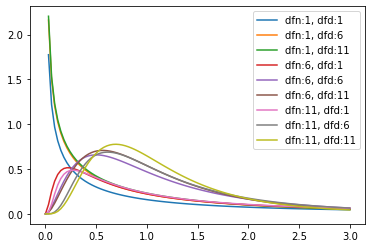

In [121]:
x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f.pdf(x, dfn=dfn, dfd=dfd)
        plt.plot(x, y, label=f'dfn:{dfn}, dfd:{dfd}')
plt.legend()

## F検定

In [122]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

In [123]:
# 標本分散
print(np.var(male_tipr), np.var(female_tipr))

0.004169445577529407 0.0028433004255488206


In [124]:
# F値計算
n1 = len(male_tipr)
n2 = len(female_tipr)
dfn = n1 - 1
dfd = n2 - 1
var1 = stats.tvar(male_tipr)
var2 = stats.tvar(female_tipr)
f = var1/var2
print(f)

1.4588472200534603


In [125]:
# p値計算
stats.f(dfn=dfn, dfd=dfd).sf(f)

0.027100863454374447

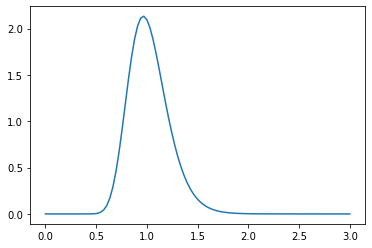

In [126]:
# F分布描画
x = np.linspace(0, 3, 100)
y = stats.f(dfn=dfn, dfd=dfd).pdf(x)
plt.plot(x, y)

## 対応ありの平均値差の検定

In [127]:
# データ読み込み
bp_df = pd.read_csv('data/blood_pressure.csv')

In [128]:
stats.ttest_rel(bp_df['bp_before'], bp_df['bp_after'], alternative='greater')

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0005648957322420411)

In [129]:
# 標本平均
bp_df['bp_before'].mean()

156.45

In [130]:
# 標本平均
bp_df['bp_after'].mean()

151.35833333333332

In [131]:
# 変化量
bp_df['delta'] = bp_df['bp_before'] - bp_df['bp_after']

In [132]:
# 変化量の平均
bp_df['delta'].mean()

5.091666666666667

<AxesSubplot:xlabel='delta'>

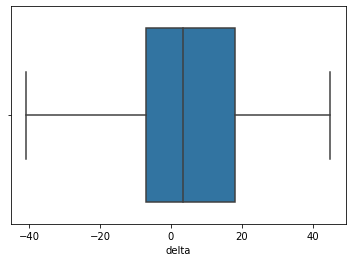

In [133]:
# 変化量の分布
sns.boxplot(x=bp_df['delta'])

## Cohen's d

In [134]:
def cohen_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    dof = n1 + n2 - 2
    std = np.sqrt(((n1-1)*stats.tvar(x1) + (n2-1)*stats.tvar(x2))/dof)
    return np.abs((np.mean(x1) - np.mean(x2)))/std

In [135]:
male_tip_rate = df[df['sex']=='Male']['tip_rate']
female_tip_rate = df[df['sex']=='Female']['tip_rate']

In [136]:
cohen_d(male_tip_rate, female_tip_rate)

0.14480153987269248

## 検定力分析

In [137]:
# インスタンス生成
power = TTestIndPower()

In [138]:
male_tip_rate = df[df['sex']=='Male']['tip_rate']
female_tip_rate = df[df['sex']=='Female']['tip_rate']

In [139]:
# t検定の結果
stats.ttest_ind(male_tip_rate, female_tip_rate, equal_var=False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

In [140]:
effect_size = cohen_d(male_tip_rate, female_tip_rate)
n1 = len(male_tip_rate)
n2 = len(female_tip_rate)
# 検定力を求める
stats_power = power.solve_power(effect_size=effect_size, nobs1=n1, alpha=0.05, power=None, ratio=n2/n1)
stats_power

0.19038260700802212

In [141]:
# 効果量を0.2とした時の検定力0.8に必要な標本1のサイズを求める
power.solve_power(effect_size=0.2, nobs1=None, alpha=0.05, power=0.8, ratio=1)

393.4056989990335

## 検定力の推移

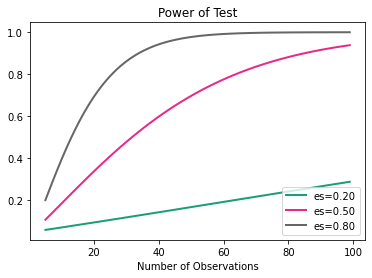

In [142]:
fig = power.plot_power(dep_var='nobs', nobs=np.array(range(5, 100)), effect_size=[0.2, 0.5, 0.8], alpha=0.05)